In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd

2024-05-18 03:11:27.105209: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-18 03:11:27.362365: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 03:11:27.362483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 03:11:27.408489: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-18 03:11:27.504074: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import cv2
import os
import PIL

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,cache_dir=".", untar=True)

In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib

In [6]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [8]:
image_count

3670

In [9]:
roses = list(data_dir.glob('roses/*'))

In [10]:
len(roses)

641

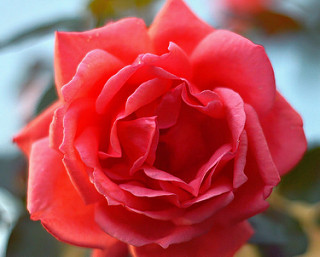

In [11]:
PIL.Image.open(str(roses[3]))

In [12]:
# making a dictionary of directories
flower_dir = {
    'roses' : list(data_dir.glob("roses/*")),
    'daisy' : list(data_dir.glob("daisy/*")),
    'dandelion' : list(data_dir.glob("dandelion/*")),
    'sunflowers' : list(data_dir.glob("sunflowers/*")),
    'tulips' : list(data_dir.glob("tulips/*"))
}

In [13]:
len(flower_dir)

5

#### using cv2 module to read this image file into opencv object (numpy array) 

In [14]:
img = cv2.imread(str(flower_dir['roses'][0]))

In [15]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [172, 168, 250],
        [173, 172, 246],
        [175, 177, 242]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [173, 170, 250],
        [170, 166, 241],
        [176, 172, 237]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [172, 167, 246],
        [177, 166, 238],
        [196, 182, 248]],

       ...,

       [[208, 161, 223],
        [219, 168, 230],
        [216, 163, 226],
        ...,
        [ 80,  77, 169],
        [ 77,  73, 168],
        [ 83,  77, 172]],

       [[204, 159, 222],
        [212, 162, 226],
        [213, 162, 224],
        ...,
        [ 90,  81, 172],
        [ 84,  77, 168],
        [ 84,  74, 167]],

       [[204, 161, 226],
        [209, 161, 227],
        [213, 161, 225],
        ...,
        [ 93,  83, 173],
        [ 92,  82, 172],
        [ 87,  76, 168]]

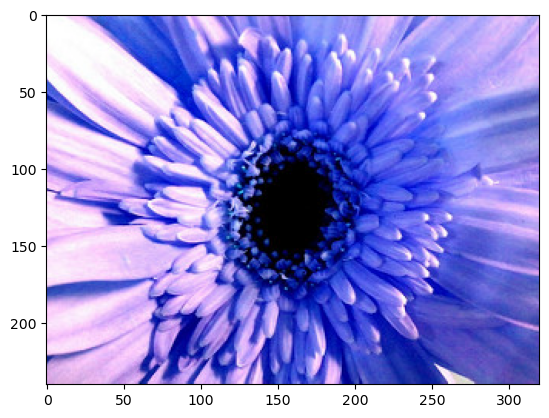

In [16]:
plt.imshow(img)

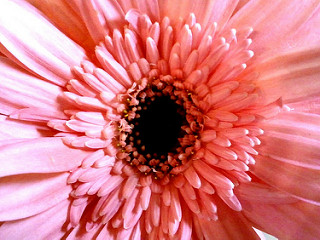

In [17]:
PIL.Image.open(str(flower_dir['roses'][0]))

In [18]:
img.shape

(240, 320, 3)

In [19]:
# now resizing this image to a fix size
img = cv2.resize(img,(100,100))

In [20]:
img.shape

(100, 100, 3)

In [21]:
flower_num = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [22]:
X, y = [], []

for flower_name, images in flower_dir.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img,(180,180))
        X.append(img)
        y.append(flower_num[flower_name])

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
# normalizing
X = X / 255

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
X.shape

(3670, 180, 180, 3)

In [27]:
X_train.shape

(2752, 180, 180, 3)

## Building a cnn

In [28]:
num_classes = 5

cnn = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180,180,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
86/86 [==============================] - 13s 150ms/step - loss: 1.4318 - accuracy: 0.3950
Epoch 2/10
86/86 [==============================] - 12s 144ms/step - loss: 1.0436 - accuracy: 0.5796
Epoch 3/10
86/86 [==============================] - 13s 147ms/step - loss: 0.8014 - accuracy: 0.6955
Epoch 4/10
86/86 [==============================] - 13s 146ms/step - loss: 0.6019 - accuracy: 0.7787
Epoch 5/10
86/86 [==============================] - 13s 147ms/step - loss: 0.3759 - accuracy: 0.8735
Epoch 6/10
86/86 [==============================] - 14s 162ms/step - loss: 0.2395 - accuracy: 0.9237
Epoch 7/10
86/86 [==============================] - 14s 160ms/step - loss: 0.1550 - accuracy: 0.9509
Epoch 8/10
86/86 [==============================] - 14s 163ms/step - loss: 0.0798 - accuracy: 0.9760
Epoch 9/10
86/86 [==============================] - 14s 162ms/step - loss: 0.0366 - accuracy: 0.9916
Epoch 10/10
86/86 [==============================] - 13s 157ms/step - loss: 0.0521 - accura

In [29]:
cnn.evaluate(X_test, y_test)

29/29 [==============================] - 1s 38ms/step - loss: 2.0011 - accuracy: 0.5980


[2.001095771789551, 0.5980392098426819]

In [ ]:
# this case of overfitting

## Using Data Augmentation to resolve Overfitting

In [31]:
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3, input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.3),
])

In [32]:
num_classes = 5

cnn_DA_and_dropout = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

cnn_DA_and_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
cnn_DA_and_dropout.fit(X_train, y_train, epochs=20)

: 

In [30]:
cnn_DA_and_dropout.evaluate(X_test, y_test)

29/29 [==============================] - 1s 42ms/step - loss: 0.8554 - accuracy: 0.6667


[0.8553817272186279, 0.6666666865348816]

#### The accuracy has increased, if we run for more epochs it will be better. Overfitting is also tackled by data augmentation and adding dropout layer